## Boundary element for potential problems (2D)

### Constant elements

The Laplace equation, also known as the potential equation, is an elliptic partial differential equation written as

\begin{equation}
    \nabla^2 T = 0
\end{equation}
where $\nabla^2 = \partial^2 / \partial x^2 + \partial^2 / \partial y^2 + \partial^2 / \partial z^2 $ is the Laplace operator and $T$ is an unknown system state, for heat conductivity is the temperature, for potential flows, its the velocity potential.

Consider a square plate of size $L$ \[m\] with an uniform heat conductivity $k$ \[W/m.K\] subjected at opposite faces to a temperature of 100 K and 0 K. There is no heat transfer to the two other opposing faces ($\nabla T = 0, $). Since the heat transfer is only going to occur in one direction, it's reasonable to approximate the Laplace equation to its one-dimensional form 

\begin{equation}
\frac{\partial^2 T}{\partial x^2} = 0.
\end{equation}

Integrating one time, one obtains

\begin{equation}
\frac{\partial T}{\partial x} + C_1 = 0,
\end{equation}
a second integration gives

\begin{equation}
T + C_1 x + C_2 = 0.
\end{equation}

The boundary condition at $x = L$ is $\partial T / \partial x = 100$,
\begin{equation}
\frac{\partial T}{\partial x}(x=L) + C_1 = 100 + C_1 = 0
\end{equation}
\begin{equation}
C_1 = -100
\end{equation}

At $x = 0$,

\begin{equation}
T(x=0) = 0
\end{equation}
so

\begin{equation}
T(x=0) -100 (x=0) + C_2 = 0,
\end{equation}
which gives

\begin{equation}
C_2 = 0.
\end{equation}

The analytical solution is then,

\begin{equation}
T(x) = 100x,\ x \in [0,L]
\end{equation}
for a square of side $L$ and different temperatures in the $y$ direction.


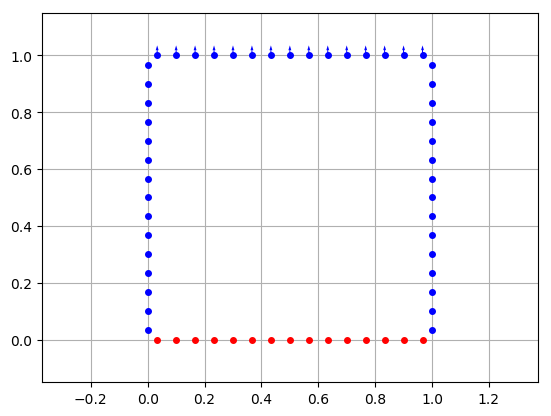

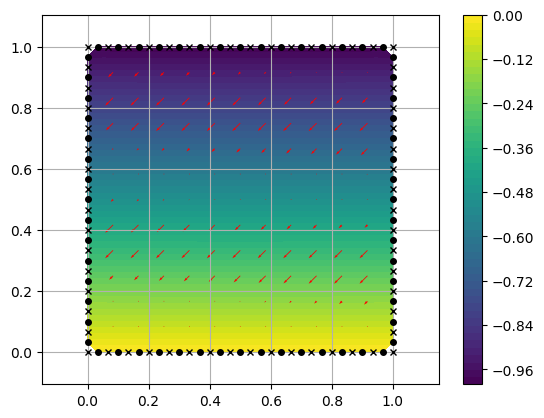

(181,)


(-0.15, 1.15)

In [6]:
# To solve this problem using the BEM, we must first
#make include the constant 2D functions
include("../src/const2D/dep.jl")
# Now, define the geometry
L = 1; # length of the square
k = 1; # heat conductivity of the material
fc = [0]; # no concentrated heat sources 
ne = 15; # number of elements/line segment
POINTS = [1 0 0
	  2 L 0
	  3 L L
	  4 0 L];
SEGMENTS = [1 1 2 0
	     2 2 3 0
	     3 3 4 0
	     4 4 1 0];
MESH = [1 ne
	 2 ne
	 3 ne
	 4 ne];
BCSeg = [1 0 0
	 2 1 0
	 3 1 1
	 4 1 0];
NPX = 11;
NPY = 11;
PONTOS_DOM=gera_p_in(NPX,NPY,POINTS,SEGMENTS); # generate domain points
n_pdom = size(PONTOS_DOM,1);
PONTOS_dom = zeros(n_pdom,3);
PONTOS_dom[:,2:3] = PONTOS_DOM[:,:];
for i = 1:n_pdom
    PONTOS_dom[i,1] = i;
end
NOS_GEO,NOS,ELEM,CDC,normal = format_dad(POINTS,SEGMENTS,MESH,BCSeg) # Apply the discretization technique and builds the problems matrices for the geometrical points, physical nodes, elements' connectivity and boundary conditions
nnos = size(NOS,1)  # Number of physical nodes, same as elements when using constant elements
npg=8; # Number of integration points
qsi,w = Gauss_Legendre(-1,1,npg) # Generation of the points and weights
G,H=cal_GeHpot(NOS,NOS_GEO,ELEM,k,fc,qsi,w);
A,b = aplica_CDC(G,H,CDC);
x = A\b # Solves the linear system
T,q = monta_phieq(CDC,x) # Applies the boundary conditions to return the velocity potential and flux
T_dom = calc_phi_pintpot(PONTOS_dom,NOS_GEO,ELEM,T,q,fc,qsi,w,k); # Evaluates the value at domain points
## Now, let's visualize the results
using PyCall
using PyPlot
plt=PyPlot
@pyimport matplotlib.tri as tri
tipoCDC = zeros(Bool,size(CDC,1));
tipoCDC[:] = CDC[:,2];
valorCDC = CDC[:,3]
mostra_problema(ELEM[:,2:3],NOS_GEO[:,2:3],NOS[:,2:3],tipoCDC,valorCDC,normal,T,q)
mostra_heatmap(NOS[:,2:3],PONTOS_dom[:,2:3],real.(T),real.(T_dom),NOS_GEO[:,2:3],ELEM[:,2:3],real.(T),real.(T))